# KNN IMPLEMENTATION ON IRIS DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# loading dataset

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
#df = df.sample(frac = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


This Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. The columns in this dataset are:
Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

# Statistical Characteristics of Dataset

In [3]:
df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                  5.1               3.5                1.4               0.2  \
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1

# Data Transformation

# Missing values

In [18]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

no missing values in this dataset

<Axes: ylabel='target'>

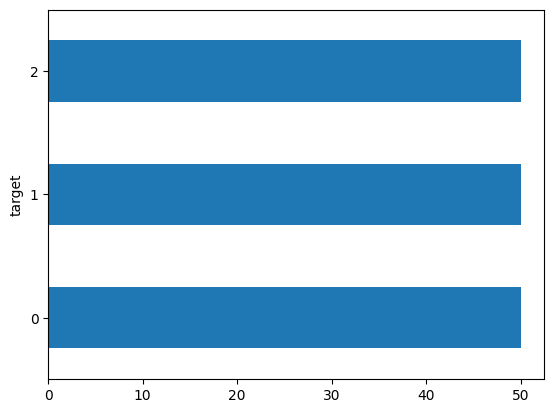

In [4]:
df.groupby('target').size().plot(kind='barh')

Now from this graph we can see in this dataset three of the class have same amount of data. So, it’s balanced dataset. Now we need a distance function. In KNN we find the distance between the test data with all our dataset. 

# Distance Function

In [5]:
def dis(a, b, p=1):
    l = len(a)
    d = 0
    for i in range(l):
        d += abs(a[i] - b[i]) ** p
    d = d ** (1/p)
    return d

Now one test point will be executed before splitting data for train and test, it’s to check all implementation, that have been so far. Here the test point that used is test_pt = [4.8, 2.7, 2.5, 0.7]. Here after taking the test point the code will measure distance from this data point with all those 150 data points. Then it’ll convert that list to a python DataFrame for further convenience

In [6]:
X = df.drop('target', axis=1)
y = df.target
test_pt = [4.8, 2.7, 2.5, 0.7]
distances = []
for i in X.index:
    a = dis(test_pt, X.iloc[i])
    distances.append(a)
dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


# Distance DataFrame is sorted to measure which class the nearest

In [7]:
def knn_sort(k,dists): return dists.sort_values(by = 'dist')[:k]

Here k is 5. And taking top k distance the majority of the class will be measure. Here a dictionary named count_set is used to keep track of the voting.

In [8]:
sorted_dists = knn_sort(5, dists)
print(sorted_dists)

count_set = {}
for i in sorted_dists.index:
    if y[i] not in count_set:
        count_set[y[i]] = 1
    else:
        count_set[y[i]] += 1

print(max(count_set))

    dist
98   1.4
57   1.5
93   1.7
24   1.8
30   1.8
1


Now this code determined the accurate prediction for that data point and now all the data can be splitted for training and testing. Hrere two library function train_test_split and StandardScaler are used from sklearn for splitting and feature scalling

# Model Training

# Split the data - 75% train, 25% test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and predicting the test set and measure accuracy

In [10]:
def KNN(X_train, X_test, y_train, y_test, k, p):
    y_predict = []
    for test_pt in X_test:
        distances = []
        for i in X_train:
            a = dis(test_pt, i, p)
            distances.append(a)
        dists = pd.DataFrame(data=distances, index=y_train.index, columns=['dist'])
        sorted_dists = knn_sort(k, dists)
        #print(sorted_dists)
        count_set = {}
        for i in sorted_dists.index:
            if y_train[i] not in count_set:
                count_set[y_train[i]] = 1
            else:
                count_set[y_train[i]] += 1
        y_predict.append(max(count_set))
    y = y_test.tolist()
    accr = 0
    for i in range(len(y)):
        if y[i] == y_predict[i]:
            accr += 1
    return accr/len(y)
    #print('Accuracy',accr/len(y))

In [11]:
KNN(X_train, X_test, y_train, y_test, 5,1)

0.868421052631579

Now the following code is to see how the model accuracy varies with respect to k value. A simple loop is used to call KNN few times, and the list is represented in a graph.

# the best accuracy we can find from KNN in this dataset.

0.9736842105263158


Text(0, 0.5, 'Accuracy (%)')

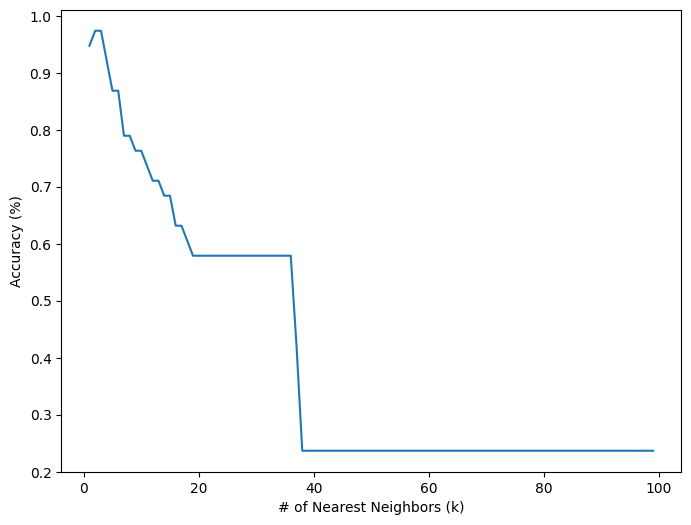

In [12]:
accuracies = []
for i in range(1,100):
    accuracies.append(KNN(X_train, X_test, y_train, y_test, i,1))

print(max(accuracies))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')

# Ratio of the Train and Test samples:

There are 112 train data sample and 38 test data samples are being considered for this problem. So, the ratio would be –

Train data = 112*100/ (113+37) % = 75%

Test data = 38*100/(113+37)% = 25%

# Data Visualization

# Scatter Plot

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

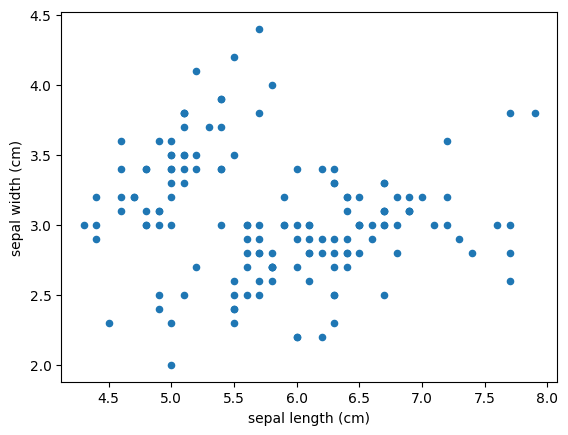

In [13]:
df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

This code uses Seaborn library to create a joint plot of two variables in a Pandas DataFrame. The x and y parameters specify the names of the columns in the DataFrame that we want to plot on the x and y axes, respectively. The data parameter specifies the name of the DataFrame containing the data to be plotted, and size specifies the size of the resulting plot. The joint plot displays a scatter plot of the relationship between the two variables, along with the distributions of each variable along the x and y axes using a histogram. This can help identify patterns or relationships between variables in the data.

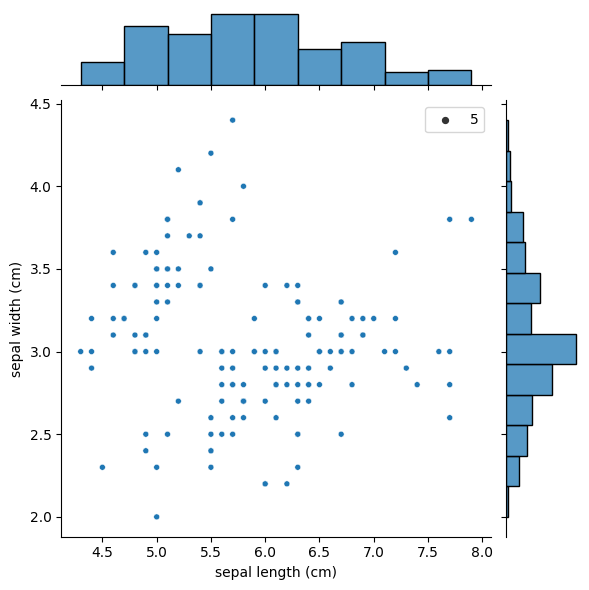

In [14]:
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=df, size=5)

<Axes: xlabel='target', ylabel='petal length (cm)'>

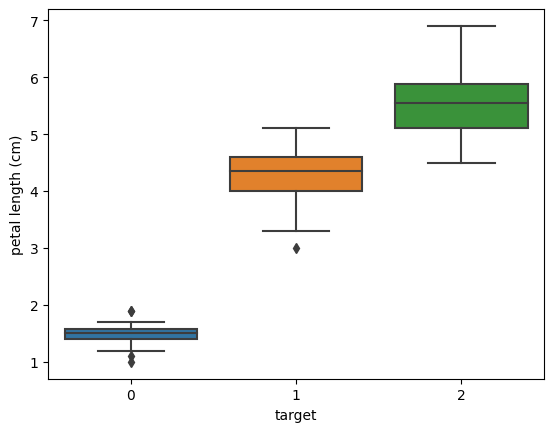

In [15]:
sns.boxplot(x="target", y="petal length (cm)", data=df)

This code creates a box plot using Seaborn library to visualize the distribution of a numerical variable (petal length (cm)) for different levels of a categorical variable (target). 

<Axes: xlabel='target', ylabel='petal length (cm)'>

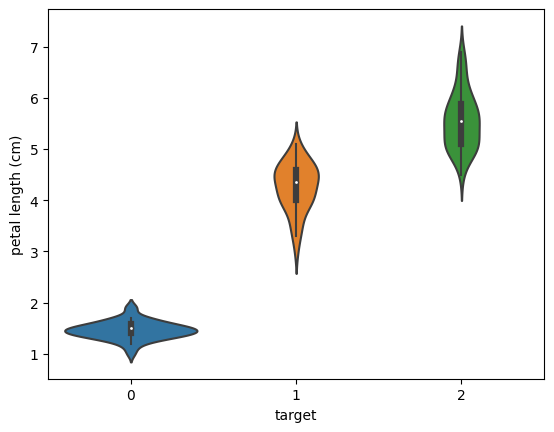

In [16]:
sns.violinplot(x="target", y="petal length (cm)", data=df, size=6)

A violin plot simplifies and combines the benefits of the box plot and kernel density plot. In a violin plot, denser regions of the data are represented by a fatter section, while sparser regions are represented by a thinner section.

# Inference

This dataset consists of the following columns sepal length, sepal width, petal length, petal width and knn algorithm is used.
first we have loaded the dataset, then found the statistical characteristics, and there are no missing values in this datset and the distance function is calculated to find the value of k, model is splitted 75% for training 25% for test, finallly the data visualisation is done.